<a href="https://colab.research.google.com/github/aamorfatti/Data-Analytics-Essential/blob/main/eksplorasi_dataset_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import library yang diperlukan
import pandas as pd         # Untuk manipulasi data
import numpy as np          # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns       # Untuk visualisasi yang lebih interaktif dan menarik

In [4]:
# 1. Memuat Dataset
# Dataset Titanic tersedia secara built-in di library Seaborn
titanic = sns.load_dataset('titanic')

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
print("5 Baris Pertama Dataset Titanic:")
print(titanic.head())

5 Baris Pertama Dataset Titanic:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# 2. Informasi Dasar dan Statistik Deskriptif
print("\nInformasi Dataset:")
print(titanic.info())

print("\nStatistik Deskriptif untuk Kolom Numerik:")
print(titanic.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Statistik Deskriptif untuk Kolom Numerik:
         su

In [20]:
# 3. Analisis Missing Values
# Menghitung jumlah missing values per kolom
missing_values = titanic.isnull().sum()
# print("\nJumlah Missing Values per Kolom:")
# print(missing_values)

# # Visualisasi missing values menggunakan heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
# plt.title("Heatmap Missing Values pada Dataset Titanic")
# plt.show()

# Mengurutkan kolom berdasarkan jumlah missing values secara menurun
missing_sorted = titanic.isnull().sum().sort_values(ascending=False) # titanic.yangkosong -> dijumlahkan -> diurutkan
missing_sorted = missing_sorted[missing_sorted > 0] # Filter hanya kolom yang memiliki missing values

# # Membuat visualisasi heatmap dengan kolom yang sudah diurutkan
# plt.figure(figsize=(12, 8))
# sns.heatmap(titanic[missing_sorted.index].isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title("Heatmap Missing Values (diurutkan)")
# plt.show()


  # cara membaca heatmap ini:
  # 1) sumbu y merepresentasikan indeks dari nilai pada sumbu x
  # 2) sumbu x merepresentasikan variable yang terdapat missing value
  # 3) semakin cerah, maka sekitar area itu semakin banyak missing value



Matriks Korelasi:
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


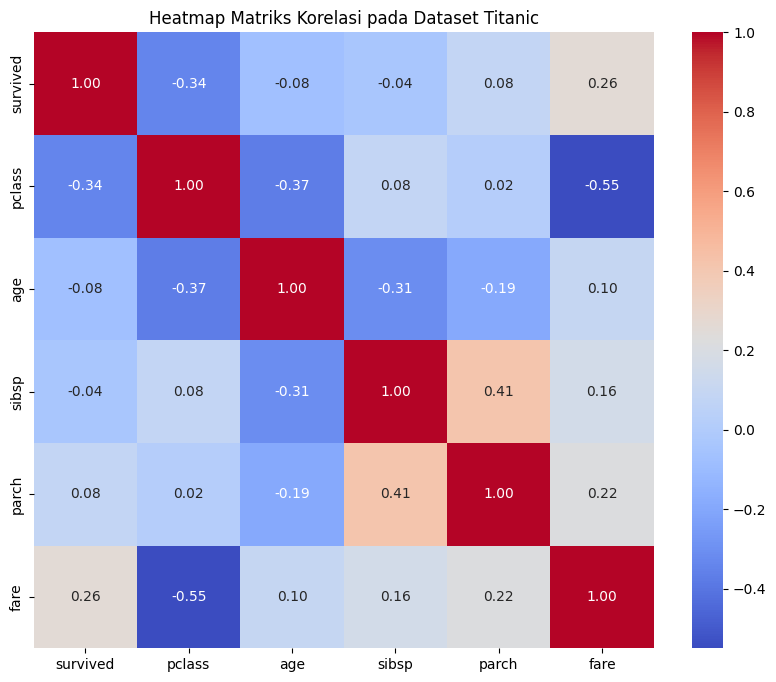

In [ ]:
# 6. Analisis Korelasi antar Variabel Numerik
# Hanya memilih kolom numerik agar tidak terjadi error konversi
numeric_data = titanic.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Matriks Korelasi pada Dataset Titanic")
plt.show()



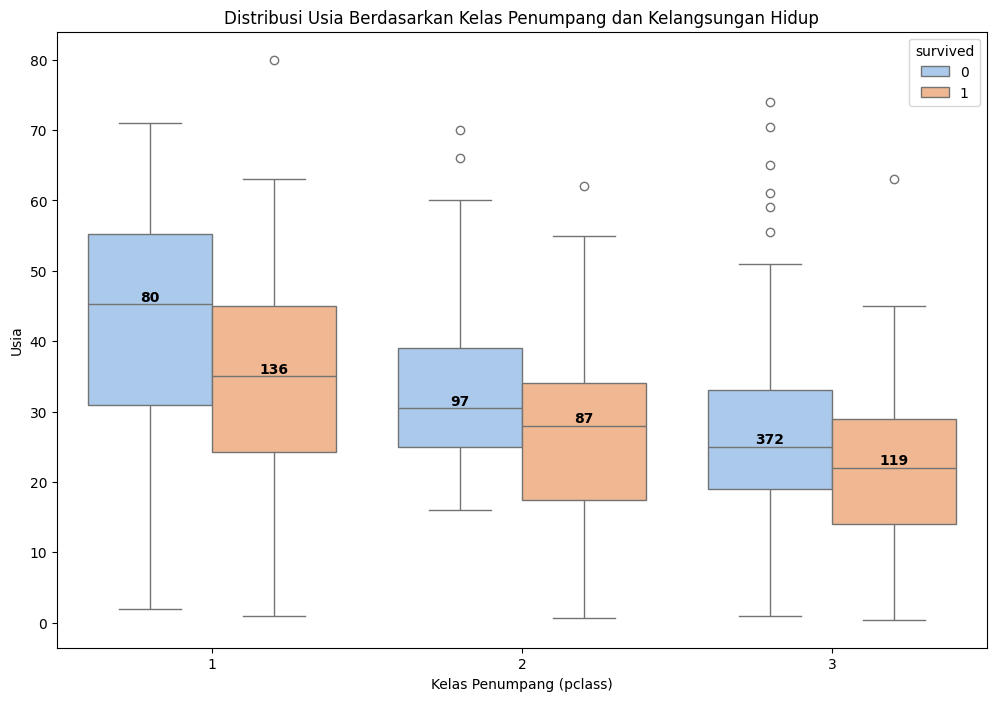

In [45]:
# memvisualisasikan kelas dan umur dari penumpang yang selamat

# Hitung jumlah penumpang per pclass dan Survived
counts = titanic.groupby(['pclass', 'survived']).size().reset_index(name='count')
# print(counts)

# plt.figure(figsize=(12, 8))
# sns.boxplot(x='pclass', y='age', hue='survived', data=titanic, palette='pastel')
# plt.title('Distribusi Usia Berdasarkan Kelas Penumpang dan Kelangsungan Hidup')
# plt.xlabel('Kelas Penumpang (pclass)')
# plt.ylabel('Usia')
# plt.show()
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='pclass', y='age', hue='survived', data=titanic, palette='pastel')
plt.title('Distribusi Usia Berdasarkan Kelas Penumpang dan Kelangsungan Hidup')
plt.xlabel('Kelas Penumpang (pclass)')
plt.ylabel('Usia')

# Ambil data median untuk posisi teks (agar teks berada di tengah box)
medians = titanic.groupby(['pclass', 'survived'])['age'].median()

# Tambahkan label count ke dalam setiap box
# Posisi x: 0 untuk pclass 1, 1 untuk pclass 2, 2 untuk pclass 3.
# Karena ada 'hue', kita geser sedikit posisinya.
for i, (pclass, group) in enumerate(titanic.groupby('pclass')):
    for j, (survived, subgroup) in enumerate(group.groupby('survived')):
        count = len(subgroup)
        # Hitung posisi x dan y
        x_pos = i + (j * 0.4 - 0.2) # Geser posisi x untuk setiap hue
        y_pos = medians[pclass, survived] # Posisikan teks sedikit di atas median

        ax.text(x_pos, y_pos, f'{count}', ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

In [22]:
# # 7. Visualisasi Hubungan Antar Variabel
# # Scatter Plot: Hubungan antara Umur (age) dan Tarif (fare)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='age', y='fare', data=titanic, hue='survived', palette='Set1', alpha=0.7)
# plt.title("Scatter Plot: Umur vs. Tarif dengan Status Kelangsungan Hidup")
# plt.xlabel("Umur")
# plt.ylabel("Tarif")
# plt.legend(title="Survived", loc="upper right")
# plt.show()

In [11]:
# # 4. Analisis Variabel Kategorik
# # Distribusi jumlah penumpang berdasarkan jenis kelamin
# plt.figure(figsize=(8, 6))
# sns.countplot(x='survived', data=titanic, palette='pastel')
# plt.title("Distribusi Penumpang Berdasarkan Jenis Kelamin")
# plt.xlabel("Jenis Kelamin")
# plt.ylabel("Jumlah Penumpang")
# plt.show()

# # Distribusi status kelangsungan hidup (Survived)
# plt.figure(figsize=(8, 6))
# sns.countplot(x='class', data=titanic, palette='Set2')
# plt.title("Distribusi kelas Penumpang")
# plt.xlabel("Status (0 = Tidak Selamat, 1 = Selamat)")
# plt.ylabel("Jumlah Penumpang")
# plt.show()

In [ ]:
# # 5. Analisis Variabel Numerik
# # Histogram Distribusi Usia (Age)
# plt.figure(figsize=(8, 6))
# sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color='skyblue')
# plt.title("Distribusi Umur Penumpang")
# plt.xlabel("Umur")
# plt.ylabel("Frekuensi")
# plt.show()

# # Boxplot Umur berdasarkan Kelas Penumpang (pclass)
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='survived', y='age', data=titanic, palette='Set3')
# plt.title("Distribusi Umur Berdasarkan Kelas Penumpang")
# plt.xlabel("selamat")
# plt.ylabel("Umur")
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.boxplot(x='class', y='survived', data=titanic, palette='Set3')
# plt.title("Distribusi Umur Berdasarkan Kelas Penumpang")
# plt.xlabel("selamat")
# plt.ylabel("Umur")
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.histplot(x='sex', y='survived', data=titanic, palette='Set3')
# plt.title("Distribusi Umur Berdasarkan Kelas Penumpang")
# plt.xlabel("selamat")
# plt.ylabel("Umur")
# plt.show()

In [ ]:
# # 8. Analisis Lanjutan: Pairplot
# # Pairplot untuk melihat hubungan antar variabel numerik dan kategorik secara menyeluruh
# sns.pairplot(titanic, hue='survived', palette='Set2', vars=['age', 'fare', 'pclass'])
# plt.suptitle("Pairplot Variabel pada Dataset Titanic", y=1.02)
# plt.show()

# 9. Kesimpulan Sementara dari EDA:
# - Dataset Titanic memiliki beberapa missing values, terutama pada kolom 'age', 'deck', dan 'embark_town'.
# - Distribusi penumpang tampak berbeda berdasarkan jenis kelamin dan status kelangsungan hidup.
# - Variabel 'fare' dan 'age' memiliki sebaran yang cukup bervariasi, dengan outlier yang terlihat di boxplot.
# - Matriks korelasi menunjukkan adanya korelasi antara variabel numerik tertentu, misalnya antara 'fare' dan 'pclass'.
# - Visualisasi hubungan (scatter plot dan pairplot) memberikan wawasan tentang interaksi antar variabel dan perbedaan antara penumpang yang selamat dan tidak.